In [ ]:
from viz import save_img_matrix, plot_save_val_metrics
%matplotlib inline

'DP_AAWK_9397_1.nii.gz'

'DP_AABJ_136_1.nii.gz', 'DP_AACA_162_1.nii.gz', 
             'DP_AADT_2223_1.nii.gz', 'DP_AASB_7172_1.nii.gz', 'DP_AAWK_9396_1.nii.gz', 
             'DP_AAWK_9397_1.nii.gz', 'DP_AAYT_160710_1.nii.gz', 'DP_AAZA_161134_1.nii.gz', 
             'DP_ABCT_164330_1.nii.gz', 'DP_ABEI_165796_1.nii.gz'

In [ ]:
# %matplotlib widget
filenames = ['DP_AINT_149192_1.nii.gz', 'DP_AABJ_136_1.nii.gz', 'DP_AACA_162_1.nii.gz', 'DP_AADT_2223_1.nii.gz', 'DP_AASB_7172_1.nii.gz', 'DP_AAWK_9396_1.nii.gz', 'DP_AAWK_9397_1.nii.gz', 'DP_AAYT_160710_1.nii.gz', 'DP_AAZA_161134_1.nii.gz', 'DP_ABCT_164330_1.nii.gz', 'DP_ABEI_165796_1.nii.gz']
# run_query_ids = ['3_03_auto_oracle_final1_nnunet_uniform', 
#                  '3_03_auto_oracle_debug_best_best', 
#                  '3_03_auto_oracle_debug_worst_worst', 
#                  '3_25_auto_oracle_debug_percentile=0.8', 
#                  '3_25_auto_oracle_debug_percentile=0.4', 
#                  '3_25_auto_oracle_debug_random',
#                 ]

run_query_ids = ['6_10_best',
                 '6_10_worst'
                 '6_10_random'
                 '6_10_uniform']
imgs_seen_ops = [20, 50, 100, 200]
input_folder = '/usr/xtmp/sc834/mammoproj/data/nnUNet_raw_data_base/nnUNet_raw_data/Task504_duke-mammo/imagesTs'
pred_folder = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns'
label_folder = '/usr/xtmp/sc834/mammoproj/data/nnUNet_raw_data_base/nnUNet_raw_data/Task504_duke-mammo/labelsTs'

save_dir = '/usr/xtmp/sc834/mammoproj/paper/figs/auto_oracle_tests'
seed = 44
iter_num = 0
for f in filenames:
    save_img_matrix(f, run_query_ids, imgs_seen_ops, input_folder, pred_folder, label_folder, save_dir = None, seed = seed, iter_num = iter_num)


## Visualization of single run

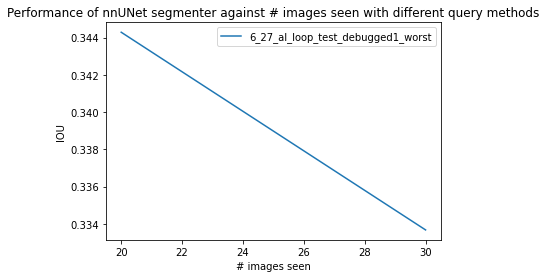

In [4]:
from viz import plot_save_val_metrics

# run_ids = ['3_03_auto_oracle_final1_nnunet', '3_03_auto_oracle_debug_best', '3_03_auto_oracle_debug_worst', '3_25_auto_oracle_debug_random']
# run_ids = ['5_22_refactor_unet']
run_ids = ['6_27_al_loop_test_debugged1']
# run_ids = ['6_10']

# run_ids = ['23_06_06']
# csv_folder = '/usr/xtmp/jly16/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
# save_dir = '/usr/xtmp/jly16/mammoproj/paper/figs/auto_oracle_tests'
csv_folder = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
save_dir = '/usr/xtmp/sc834/mammoproj/paper/figs/auto_oracle_tests'

plot_save_val_metrics(run_ids, csv_folder, save_dir = None)

## Code to visualize runs from multiple users, across multiple Run_IDs

Text(0.5, 1.0, 'Performance of nnUNet segmenter against # images seen with different query methods')

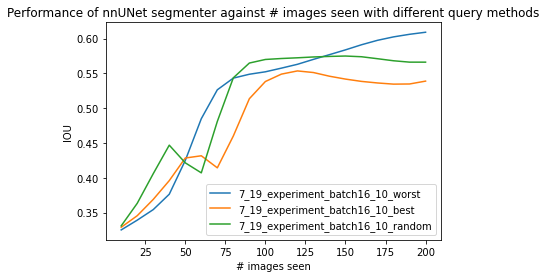

In [51]:
# Visualizing results from sc834, gk122.

import pandas as pd
import os
import matplotlib.pyplot as plt

list_csv = [
      '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/', 
      # '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/BATCH_TEST_JUL_3_TRIAL_2/worst',
      # '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/BATCH_TEST_JUL_3_TRIAL_2/random',
      # '/usr/xtmp/gk122/mammoproj/nnunet_integration_tmp/AllOracleRuns/FullRuns'
]

run_id_lists = [
      # ['7_03_remodel1_batch_test_best_20'],
      # ['7_03_remodel1_batch_test_worst_20'],
      # ['7_03_remodel1_batch_test_random_10'],
      # ['JUL_3_BATCH_TEST_20_20']
      # ['7_12_remodel2_full2_cbis_ddsm_15'],
      # ['7_11_remodel2_test9_random_44']
      # ['7_13_remodel2_test2_10', '7_13_remodel2_test5_10'] # This is fully implemented remodel2 run for random
      # ['7_14_remodel2_NEW1_10', '7_14_remodel2_NEW2_10']
      # ['7_15_debug1_10', '7_15_debug2_10'] # Run of re-aligned remodel2 - without fine tuning / addressing sub problems
      # ['7_16_debug_full3_44'] # run in increments of 5
      # ['7_17_discviz_full1_30']
      # ['7_17_disc_update_full1_30']
      # ['7_18_fullrun_100_100']
      # ['7_19_FULLRUN2_10_10']
      # ['7_22_fullrange_test1_10']
      # ['7_23_expt_seg_epochs10_10']
      ['7_19_experiment_batch16_10']
      ]

for index, csv in enumerate(list_csv):
      for run_id in run_id_lists[index]:
            df = pd.read_csv(os.path.join(csv, "Run_"+run_id,'experiment_output.csv'))
            for query_type in df.query_type.unique():
                df_q = df.loc[df['query_type'] == query_type]
                plt.plot(df_q.imgs_seen, df_q.IOU, label = run_id + '_' + query_type)
    

plt.legend()
plt.xlabel("# images seen")
plt.ylabel('IOU')
plt.title('Performance of nnUNet segmenter against # images seen with different query methods')

In [8]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt


# csv_uniform = '/usr/xtmp/gk122/mammoproj/nnunet_integration_tmp/AllOracleRuns/FullRuns/'
# csv_random =  '/usr/xtmp/gk122/mammoproj/nnunet_integration_tmp/AllOracleRuns/FullRuns/'
# csv_worst = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/BATCH_TEST_JUL_3_TRIAL_2/worst'
# csv_best = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/BATCH_TEST_JUL_3_TRIAL_2/best'

# ids_uniform = 'JUL_3_BATCH_TEST'
# ids_random = 'JUL_4_BATCH_TEST'
# ids_worst = '7_03_remodel1_batch_test_worst'
# ids_best = '7_03_remodel1_batch_test_best'

# fig, ax = plt.subplots()
# fig.set_figwidth(10)
# fig.set_figheight(6)

# def calculate_mean_over_results_and_plot(csv_list, ids_list):
#     for index, csv in enumerate(csv_list):

#         dfs = []
#         for i in range(10, 60, 10):

#             if 'sc834' in csv:
#                 cur = os.path.join(csv, f"Run_{ids_list[index]}_{i}", "experiment_output.csv")
#             else:
#                 cur = os.path.join(csv, f"Run_{ids_list[index]}_{i}_{i}", "experiment_output.csv")
#             df = pd.read_csv(cur)

#             query_type = df['query_type'].iloc[0]

#             dfs.append(df)

            
#         df_avg = (pd.concat(dfs).replace(0, np.nan).reset_index().groupby("index").mean())
#         # print(df_avg)

        
#         plt.plot(df_avg.imgs_seen, df_avg.IOU, label = ids_list[index] + '_' + query_type )


# calculate_mean_over_results_and_plot([csv_random, csv_uniform], [ids_random, ids_uniform])
# calculate_mean_over_results_and_plot([csv_best, csv_worst], [ids_best, ids_worst])
# plt.legend()
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# plt.text(0.55, 0.15, 'NOTE: Each method averaged over \n random seeds 10, 20, 30, 40, 50', transform=ax.transAxes, fontsize=13,
#         verticalalignment='top', bbox=props)
# plt.xlabel("# images seen")
# plt.ylabel('IOU Performance')
# plt.title('Performance of nnUNet segmenter against # images seen with different query methods')

# # ax.set_facecolor("black")


## One way to calculate average IOU

In [15]:
csv_folder = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/BATCH_TEST_JUL_3_TRIAL_2/best'

run_ids = ['7_03_remodel1_batch_test_best']
for id in run_ids:
    dfs = []
    for i in range(10, 60, 10):
        cur = os.path.join(csv_folder, f"Run_{id}_{i}", "experiment_output.csv")
        df = pd.read_csv(cur)
        dfs.append(df)
    df = (pd.concat(dfs).replace(0, np.nan).reset_index().groupby("index").mean())
    print(df.head())

       Unnamed: 0  random_seed  imgs_seen       IOU
index                                              
0             NaN         30.0       20.0  0.332153
1             1.0         30.0       30.0  0.346367
2             2.0         30.0       40.0  0.358477
3             3.0         30.0       50.0  0.370401
4             4.0         30.0       60.0  0.388396


### Simple one-time visualization of predicted and ground_truth mask

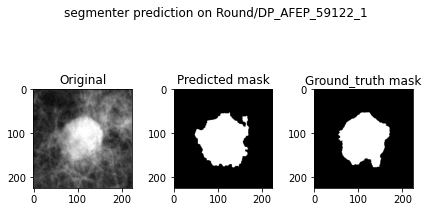

In [19]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import cv2
import numpy as np
import os

# filepath = "/usr/xtmp/sc834/mammoproj/data/cbis_ddsm_data/stacks_npy/DP_00366_RIGHT_MLO_1.npy"
# filepath = "/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_13_remodel2_test2_10/initial_segmentations_npy/Round/DP_ADVC_33157_1.npy"
# img = np.load(filepath)
# resized = resize(img[0,:,:], (224, 224), order=0, preserve_range=True)
# resized_cv = cv2.resize(img[0,:,:], (224, 224), interpolation=cv2.INTER_NEAREST)
# print(resized.shape)

pat_id = 'Round/DP_AFEP_59122_1'
cbis_ddsm_id = 'DP_00935_LEFT_CC_1'

filepath = os.path.join("/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_15_debug5_10/worst/Iter_1_20/initial_segmentations_npy_stacks/", pat_id + '.npy')
# filepath = os.path.join("/usr/xtmp/sc834/mammoproj/data/cbis_ddsm_data/stacks_npy", cbis_ddsm_id + '.npy')
# filepath = os.path.join("/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_13_remodel2_test2_10/random/Loop_1_20/initial_segmentations_npy_stacks/", pat_id + '.npy')
ground_truth_path = os.path.join("/usr/xtmp/vs196/mammoproj/Data/final_dataset/train", pat_id + '.npy')

img = np.load(filepath)
arr = img[0,:,:]
mask = img[1,:,:]

## SOME TESTING
# print(np.sum(mask > 0.5))
# print(np.unique(mask))
# print(mask.shape)
# print('\n\n\nNext')
# img_truth = np.load(ground_truth_path)
# mask_truth = img_truth[1,:,:]
# print(np.unique(mask_truth))
# print(np.count_nonzero(mask_truth))
# print(np.sum((0 < mask_truth) & (mask_truth < 1)))
# print(img.shape)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.tight_layout()
fig.suptitle(f"segmenter prediction on {pat_id}")
ax0.imshow(arr, cmap='gray')
ax0.set_title('Original')
ax1.imshow(mask, cmap='gray')
ax1.set_title("Predicted mask")
ax2.imshow(mask_truth, cmap='gray')
ax2.set_title("Ground_truth mask")

plt.show(fig)

### Calculate IOU for a single prediction/ground_truth pair

In [21]:
from auto_oracle import calculate_iou
import torch

# pat_id = 'Irregular/DP_AJTT_82942_1'

# first_10 = {'Round/DP_AFUZ_74317_1': 0.3422226309776306, 'Oval/DP_AFMX_67162_1': 0.3518967926502228, 'Oval/DP_AFPZ_69876_1': 0.3581995666027069, 'Oval/DP_AGZJ_114093_1': 0.3602611720561981, 'Round/DP_AAZB_161148_1': 0.36027172207832336, 'Oval/DP_ABBH_163181_1': 0.36321815848350525, 'Oval/DP_AGYP_113678_1': 0.3632930517196655, 'Oval/DP_AAPK_631_2': 0.364230215549469, 'Oval/DP_ACFC_13762_1': 0.3742491900920868, 'Irregular/DP_ALAR_23841_2': 0.375236839056015}
# last_10 = {'Irregular/DP_ADLR_28613_1': 0.6729084253311157, 'Oval/DP_ADLQ_28579_2': 0.6747674942016602, 'Irregular/DP_ADLR_28610_1': 0.678376317024231, 'Irregular/DP_ACJY_15690_1': 0.6788897514343262, 'Oval/DP_AHKI_123262_1': 0.6792495250701904, 'Oval/DP_ADPO_30492_1': 0.6830247044563293, 'Irregular/DP_AJTT_82942_1': 0.686072587966919, 'Irregular/DP_ACJY_15689_1': 0.6931850910186768, 'Irregular/DP_ADLQ_28578_3': 0.6953437924385071, 'Round/DP_AFEP_59122_1': 0.6998247504234314}

first_10 = {'Oval/DP_AHCR_117066_1': 0.4613610804080963, 'Round/DP_AIHC_143248_1': 0.4641888737678528, 'Round/DP_ACYY_22756_1': 0.46437835693359375, 'Round/DP_AFXS_79651_1': 0.46477755904197693, 'Irregular/DP_AFMA_66199_1': 0.4650367498397827, 'Irregular/DP_ABGG_167240_1': 0.4651813209056854, 'Irregular/DP_ACYE_21697_1': 0.46542030572891235, 'Oval/DP_AHSI_129720_1': 0.4660240411758423, 'Oval/DP_AAOT_6126_1': 0.4661884903907776, 'Oval/DP_ACLU_16346_1': 0.46665048599243164}
last_10 = {'Irregular/DP_AHYC_134388_1': 0.5122203826904297, 'Irregular/DP_AJTT_82942_1': 0.5123637318611145, 'Oval/DP_AGZJ_114093_1': 0.512516438961029, 'Irregular/DP_ALYI_48129_1': 0.5126250982284546, 'Round/DP_AGSO_108513_1': 0.5128195285797119, 'Oval/DP_ALUT_44531_1': 0.5129814147949219, 'Round/DP_AFEP_59122_1': 0.5136575698852539, 'Irregular/DP_AIDZ_140009_1': 0.5143408179283142, 'Oval/DP_AAEU_173629_1': 0.5156411528587341, 'Oval/DP_AGYP_113678_1': 0.5237335562705994}

ground_truth_dir = '/usr/xtmp/vs196/mammoproj/Data/final_dataset/train'
segmentation_dir = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_15_debug3_10/worst/Iter_1_20/initial_segmentations_npy_stacks'

calculate_iou(pat_id,0.1,ground_truth_dir,segmentation_dir)

# for id in list(first_10.keys()):
#     print(calculate_iou(id,0.1,ground_truth_dir,segmentation_dir))

tensor(0.8363)

### Check shape and values of image/masks

In [23]:
path = '/usr/xtmp/sc834/mammoproj/data/cbis_ddsm_data/labels_npy/DP_00004_RIGHT_MLO_1.npy'
path2 = '/usr/xtmp/sc834/mammoproj/data/cbis_ddsm_data/stacks_npy/DP_00001_LEFT_CC_1.npy'
img = np.load(path2)
mask = img[1,:,:]
print(np.unique(mask))
print(mask.shape)

[0. 1.]
(224, 224)


### Check the shape/unique values of resized masks

In [25]:
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
from skimage.transform import resize

# Trying out transform resize
img = np.load(filepath)
mask = img[1,:,:]
print(mask.shape)
print(np.unique(mask))

m1 = resize(mask, (256, 256), order=0, preserve_range=True)
m2 = cv2.resize(mask, (224, 224), interpolation=cv2.INTER_NEAREST)

print(np.unique(m1))
print(np.unique(m2))

transforms_arr = [transforms.ToTensor(),transforms.Resize((256,256))]
transform = transforms.Compose(transforms_arr)

mask_transformed = transform(mask)
print(mask_transformed.shape)
print(np.unique(mask_transformed))

(224, 224)
[0. 1.]
[0. 1.]
[0. 1.]
torch.Size([1, 256, 256])
[0.         0.00390625 0.01171875 0.01953125 0.02734375 0.03515625
 0.04296875 0.05078125 0.05859375 0.0625     0.08203125 0.09765625
 0.10546875 0.12109375 0.12890625 0.13671875 0.15234375 0.17578125
 0.1875     0.19140625 0.21484375 0.23828125 0.24609375 0.25390625
 0.29296875 0.30078125 0.3125     0.31640625 0.33984375 0.35546875
 0.38671875 0.41015625 0.4375     0.44140625 0.45703125 0.47265625
 0.52734375 0.54296875 0.55859375 0.5625     0.58984375 0.61328125
 0.64453125 0.66015625 0.68359375 0.6875     0.69921875 0.70703125
 0.74609375 0.75390625 0.76171875 0.78515625 0.80859375 0.8125
 0.82421875 0.84765625 0.86328125 0.87109375 0.87890625 0.89453125
 0.90234375 0.91796875 0.9375     0.94140625 0.94921875 0.95703125
 0.96484375 0.97265625 0.98046875 0.98828125 0.99609375 1.        ]


/home/users/sc834/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


### Check how floodfill works 
Creates and stacks another layer onto an existing image/mask pair - so after floodfill, it creates a image/mask/floodfill stack. 

In [36]:
# # NOTE: Run this to create NEW floodfill segmentations
# # Tryout floodfill - does it do anything?

# from floodfill import convert_directory_to_floodfill
# from tqdm import tqdm

# in_dir = "/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_Run_7_15_new1_10/best/Iter_1_20/initial_segmentations_npy_stacks"
# in_dir = convert_directory_to_floodfill(in_dir)

(256, 256)


Text(0.5, 1.0, 'Original')

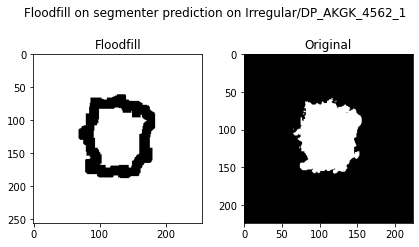

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os

in_dir = "/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_Run_7_15_new1_10/best/Iter_1_20/initial_segmentations_npy_stack_ff"
reference_dir = "/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_15_t6_10/best/Iter_1_20/initial_segmentations_npy_stacks"

pat_id = 'Irregular/DP_AKGK_4562_1'

img_floodfill = np.load(os.path.join(in_dir, pat_id + '.npy'))[2,:,:]
img_org = np.load(os.path.join(reference_dir, pat_id + '.npy'))[1,:,:]

print(img_floodfill.shape)

fig, (ax0, ax1) = plt.subplots(1, 2)
fig.tight_layout()
fig.suptitle(f"Floodfill on segmenter prediction on {pat_id}")
ax0.imshow(img_floodfill, cmap='gray')
ax0.set_title('Floodfill')
ax1.imshow(img_org, cmap='gray')
ax1.set_title("Original")

## Code to visualize patient scores by discriminator

20


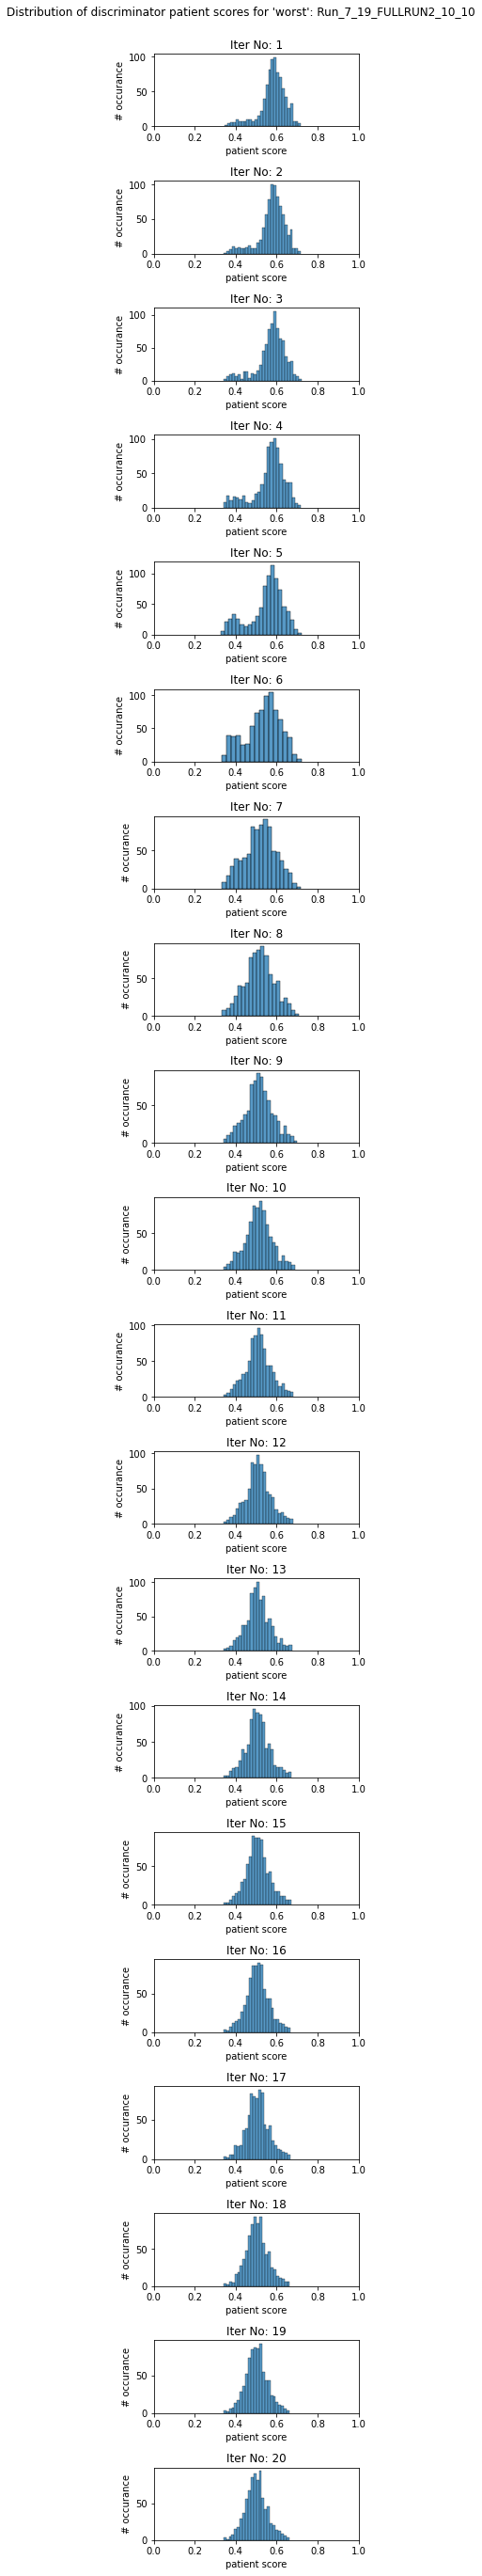

In [29]:
# Try visualizing all patient scores - based on list of patient score dictionaries
import seaborn as sns
import os
import ast
import yaml
import matplotlib.pyplot as plt
import pickle

filepath = "/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_19_FULLRUN2_10_10/worst_all_patient_scores_dict.pickle"
with open(filepath, 'rb') as f:
    dict_list = pickle.load(f)
    len_dicts = len(dict_list)
    print(len_dicts)

    fig, ax = plt.subplots(len_dicts, figsize=(4, 2 * len_dicts))
    fig.suptitle("Distribution of discriminator patient scores for 'worst': Run_7_19_FULLRUN2_10_10")

    for i, dic in enumerate(dict_list):
        scores = []
        for id in list(dic.keys()):
            scores.append(dic[id])

        ax[i].set_title(f"Iter No: {i+1}")
        ax[i].set_xlim(0, 1)
        ax[i].set_xlabel('patient score')
        ax[i].set_ylabel('# occurance')
        sns.histplot(scores, ax=ax[i])  # distplot is deprecate and replaced by histplot
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    # sns.distplot(scores)
    

### Code to visualize discriminator performance with IOU

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from auto_oracle import calculate_iou
import torch
import pickle
import seaborn as sns

# Written to work for experiment_remodel2.py output

# Visualize prediction of various IOUs
run_id = 'Run_7_18_fullrun_10_10'
ground_truth_dir = '/usr/xtmp/vs196/mammoproj/Data/final_dataset/train'
base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
query_method = 'best'

segmentation_dir = os.path.join(base_path, run_id, query_method)
patient_scores_path = os.path.join(base_path, run_id, 'best_all_patient_scores_dict.pickle')
patient_scores = pickle.load(open(patient_scores_path, 'rb'))

iters = [1, 4, 8, 13]

figure, axis = plt.subplots(2, 2, figsize=(15, 8))

for i, ax in enumerate(axis.flat):
    x_axis = [] # patient scores
    y_axis = [] # iou against ground truth

    iter = iters[i]
    iter_prefix = f'Iter_{iter}_'
    cur_iter_path = os.path.join(segmentation_dir, [filename for filename in os.listdir(segmentation_dir) if filename.startswith(iter_prefix)][0])
    img_seen = cur_iter_path.split('_')[2]
    
    seg_dir = os.path.join(cur_iter_path, 'initial_segmentations_npy_stacks')
    scores = patient_scores[iter - 1]

    for score in scores:
        cur_id = score

        x_axis.append(scores[score])

        ground_truth_stack = np.load(os.path.join(ground_truth_dir, cur_id + '.npy'))
        original_img = ground_truth_stack[0,:,:]
        ground_truth_mask = ground_truth_stack[1,:,:]
        iou = round(calculate_iou(cur_id, 0.8, ground_truth_dir, seg_dir).item(), 2)
        y_axis.append(iou)

    ax.scatter(x_axis, y_axis)
    ax.plot(np.unique(x_axis), np.poly1d(np.polyfit(x_axis, y_axis, 1))(np.unique(x_axis)))
    ax.set_title(f'Iteration {iter} ({img_seen} images seen)')

plt.setp(axis[-1, :], xlabel='Discriminator patient score')
plt.setp(axis[:, 0], ylabel='IOU metric')

### Visualize # correctly labelled by segmenter

Text(0.5, 1.0, '# correctly labelled with IOU threshold 0.8')

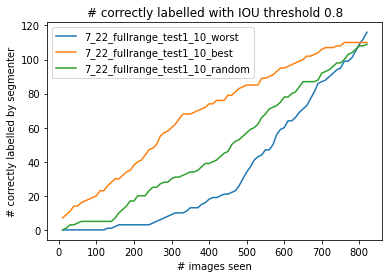

In [38]:
# Visualiez # correctly labelled by segmenter
import pandas as pd
import matplotlib.pyplot as plt
import os


base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
run_id = '7_22_fullrange_test1_10'


df = pd.read_csv(os.path.join(base_path, "Run_"+run_id,'experiment_output.csv'))
for query_type in df.query_type.unique():
      df_q = df.loc[df['query_type'] == query_type]
      plt.plot(df_q.imgs_seen, df_q.num_correctly_labeled, label = run_id + '_' + query_type)


plt.legend()
plt.xlabel("# images seen")
plt.ylabel('# correctly labelled by segmenter')
plt.title('# correctly labelled with IOU threshold 0.8')

### Code to create a single visualization of predictions of different IOUs

0.81
0.79
0.74


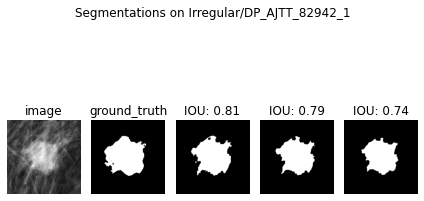

In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np
from auto_oracle import calculate_iou
import torch

# Visualize prediction of various IOUs
ground_truth_dir = '/usr/xtmp/vs196/mammoproj/Data/final_dataset/train'
base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
segmentation_dir = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_18_fullrun_10_10/best'
all_iters = ['Iter_1_20/', 'Iter_2_30/', 'Iter_3_40/', 'Iter_4_50/', 'Iter_5_60/', 'Iter_6_70/', 'Iter_7_80/', 
             'Iter_8_90/', 'Iter_9_100', 'Iter_10_120','Iter_11_150', 'Iter_12_170/', 'Iter_13_200/']
iter_list = ['Iter_1_20', 'Iter_4_50', 'Iter_13_200']
run_id = '7_18_fullrun_10_10'
pat_ids = ['Irregular/DP_AJTT_82942_1']

all_pred_files = []

# pat_id = 'Irregular/DP_AJTT_82942_1'
# first_10 = {'Round/DP_AFUZ_74317_1': 0.3422226309776306, 'Oval/DP_AFMX_67162_1': 0.3518967926502228, 'Oval/DP_AFPZ_69876_1': 0.3581995666027069, 'Oval/DP_AGZJ_114093_1': 0.3602611720561981, 'Round/DP_AAZB_161148_1': 0.36027172207832336, 'Oval/DP_ABBH_163181_1': 0.36321815848350525, 'Oval/DP_AGYP_113678_1': 0.3632930517196655, 'Oval/DP_AAPK_631_2': 0.364230215549469, 'Oval/DP_ACFC_13762_1': 0.3742491900920868, 'Irregular/DP_ALAR_23841_2': 0.375236839056015}
# last_10 = {'Irregular/DP_ADLR_28613_1': 0.6729084253311157, 'Oval/DP_ADLQ_28579_2': 0.6747674942016602, 'Irregular/DP_ADLR_28610_1': 0.678376317024231, 'Irregular/DP_ACJY_15690_1': 0.6788897514343262, 'Oval/DP_AHKI_123262_1': 0.6792495250701904, 'Oval/DP_ADPO_30492_1': 0.6830247044563293, 'Irregular/DP_AJTT_82942_1': 0.686072587966919, 'Irregular/DP_ACJY_15689_1': 0.6931850910186768, 'Irregular/DP_ADLQ_28578_3': 0.6953437924385071, 'Round/DP_AFEP_59122_1': 0.6998247504234314}

# first_10 = {'Oval/DP_AHCR_117066_1': 0.4613610804080963, 'Round/DP_AIHC_143248_1': 0.4641888737678528, 'Round/DP_ACYY_22756_1': 0.46437835693359375, 'Round/DP_AFXS_79651_1': 0.46477755904197693, 'Irregular/DP_AFMA_66199_1': 0.4650367498397827, 'Irregular/DP_ABGG_167240_1': 0.4651813209056854, 'Irregular/DP_ACYE_21697_1': 0.46542030572891235, 'Oval/DP_AHSI_129720_1': 0.4660240411758423, 'Oval/DP_AAOT_6126_1': 0.4661884903907776, 'Oval/DP_ACLU_16346_1': 0.46665048599243164}
# last_10 = {'Irregular/DP_AHYC_134388_1': 0.5122203826904297, 'Irregular/DP_AJTT_82942_1': 0.5123637318611145, 'Oval/DP_AGZJ_114093_1': 0.512516438961029, 'Irregular/DP_ALYI_48129_1': 0.5126250982284546, 'Round/DP_AGSO_108513_1': 0.5128195285797119, 'Oval/DP_ALUT_44531_1': 0.5129814147949219, 'Round/DP_AFEP_59122_1': 0.5136575698852539, 'Irregular/DP_AIDZ_140009_1': 0.5143408179283142, 'Oval/DP_AAEU_173629_1': 0.5156411528587341, 'Oval/DP_AGYP_113678_1': 0.5237335562705994}

for pat_id in pat_ids:
    fig, axes = plt.subplots(1, 5)
    fig.suptitle(f"Segmentations on {pat_id}")

    ground_truth_stack = np.load(os.path.join(ground_truth_dir, pat_id + '.npy'))
    original_img = ground_truth_stack[0,:,:]
    ground_truth_mask = ground_truth_stack[1,:,:]

    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title('image')
    axes[1].imshow(ground_truth_mask, cmap='gray')
    axes[1].set_title('ground_truth')

    ax_index = 0

    for index, iter in enumerate(all_iters):

        seg_dir = os.path.join(segmentation_dir, iter, 'initial_segmentations_npy_stacks')
        iou = round(calculate_iou(pat_id,0.8,ground_truth_dir, seg_dir).item(), 2)

        if 0.9 > iou > 0.6 and ax_index < 3:
            stack = np.load(os.path.join(segmentation_dir, iter, 'initial_segmentations_npy_stacks', pat_id + '.npy'))
            original_img = stack[0,:,:]
            mask = stack[1,:,:]

            print(iou)
            axes[ax_index+2].imshow(mask, cmap='gray')
            axes[ax_index+2].set_title(f'IOU: {iou}')
            ax_index += 1
        
    for ax in axes:
        ax.axis('off')
    fig.tight_layout()


# iou = calculate_iou(pat_id,0.1,ground_truth_dir,segmentation_dir)

# for id in list(first_10.keys()):
#     print(calculate_iou(id,0.1,ground_truth_dir,segmentation_dir))


## Code to visualize predictions of different IOUs across multiple patient scores

['Irregular/DP_AEAF_35762_1', 'Irregular/DP_ADLQ_28578_3', 'Irregular/DP_AIOQ_149979_1', 'Irregular/DP_ADLR_28610_1', 'Oval/DP_AHKI_123262_1', 'Irregular/DP_AKAY_89028_1', 'Oval/DP_ADPO_30492_1', 'Round/DP_AFEP_59122_1', 'Round/DP_ADVC_33157_1', 'Oval/DP_ADLP_28567_1']
{'Iter_1_20/': 0.8, 'Iter_2_30/': 0.82, 'Iter_3_40/': 0.82, 'Iter_4_50/': 0.73, 'Iter_5_60/': 0.58, 'Iter_6_70/': 0.62, 'Iter_7_80/': 0.67, 'Iter_8_90/': 0.69, 'Iter_9_100': 0.7, 'Iter_10_120': 0.72, 'Iter_11_150': 0.73, 'Iter_12_170/': 0.72, 'Iter_13_200/': 0.69}
{'Iter_1_20/': 0.78, 'Iter_2_30/': 0.79, 'Iter_3_40/': 0.79, 'Iter_4_50/': 0.75, 'Iter_5_60/': 0.63, 'Iter_6_70/': 0.68, 'Iter_7_80/': 0.73, 'Iter_8_90/': 0.74, 'Iter_9_100': 0.75, 'Iter_10_120': 0.76, 'Iter_11_150': 0.76, 'Iter_12_170/': 0.76, 'Iter_13_200/': 0.75}
{'Iter_1_20/': 0.0, 'Iter_2_30/': 0.0, 'Iter_3_40/': 0.0, 'Iter_4_50/': 0.0, 'Iter_5_60/': 0.0, 'Iter_6_70/': 0.0, 'Iter_7_80/': 0.0, 'Iter_8_90/': 0.0, 'Iter_9_100': 0.0, 'Iter_10_120': 0.0, 'Iter_

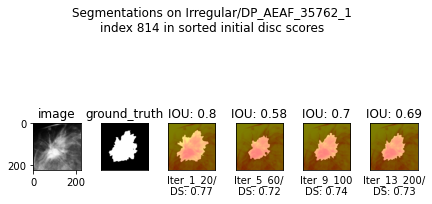

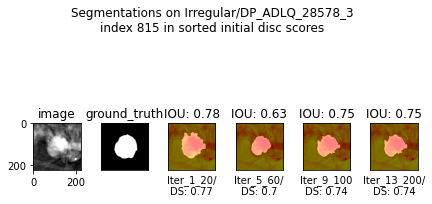

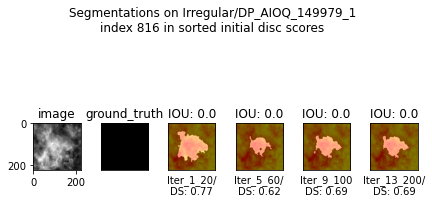

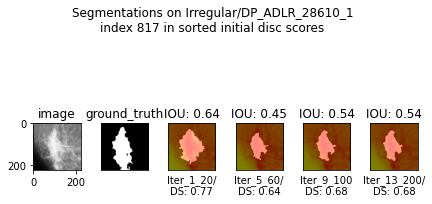

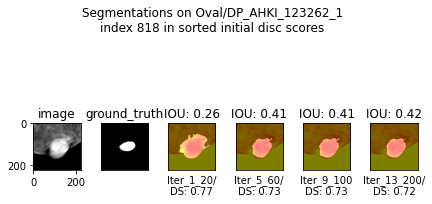

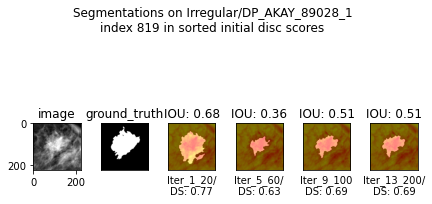

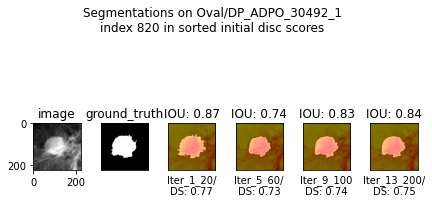

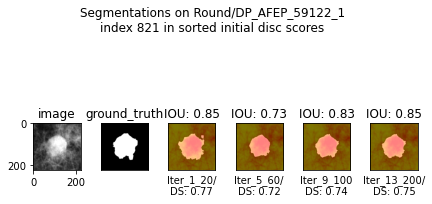

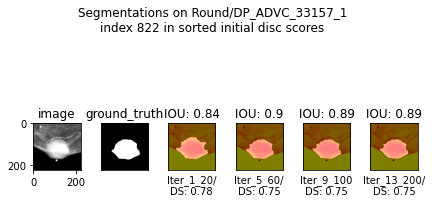

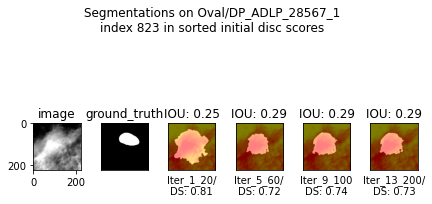

In [9]:
# TODO: Implement this
import os
import matplotlib.pyplot as plt
import numpy as np
from auto_oracle import calculate_iou
import torch
import pickle

# Visualize prediction of various IOUs
ground_truth_dir = '/usr/xtmp/vs196/mammoproj/Data/final_dataset_corrected/train'
base_path = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'
segmentation_dir = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_18_fullrun_10_10/best'
all_iters = ['Iter_1_20/', 'Iter_2_30/', 'Iter_3_40/', 'Iter_4_50/', 'Iter_5_60/', 'Iter_6_70/', 'Iter_7_80/', 
             'Iter_8_90/', 'Iter_9_100', 'Iter_10_120','Iter_11_150', 'Iter_12_170/', 'Iter_13_200/']
iter_list = ['Iter_1_20', 'Iter_4_50', 'Iter_13_200']
run_id = '7_18_fullrun_10_10'
pat_ids = []

with open(os.path.join(base_path, "Run_" + run_id, 'best_all_patient_scores_dict.pickle'), "rb") as input_file:
    all_patient_scores = pickle.load(input_file)

initial_pat_ids = list(all_patient_scores[0].keys())
selected_pat_ids = list(initial_pat_ids[i] for i in list(range(0, 824, 100)))
selected_pat_ids.append(list(all_patient_scores[0].keys())[823])
# selected_pat_ids = initial_pat_ids[-10:]
print(selected_pat_ids)

all_pred_files = []

# first_10 = {'Round/DP_AFUZ_74317_1': 0.3422226309776306, 'Oval/DP_AFMX_67162_1': 0.3518967926502228, 'Oval/DP_AFPZ_69876_1': 0.3581995666027069, 'Oval/DP_AGZJ_114093_1': 0.3602611720561981, 'Round/DP_AAZB_161148_1': 0.36027172207832336, 'Oval/DP_ABBH_163181_1': 0.36321815848350525, 'Oval/DP_AGYP_113678_1': 0.3632930517196655, 'Oval/DP_AAPK_631_2': 0.364230215549469, 'Oval/DP_ACFC_13762_1': 0.3742491900920868, 'Irregular/DP_ALAR_23841_2': 0.375236839056015}
# last_10 = {'Irregular/DP_ADLR_28613_1': 0.6729084253311157, 'Oval/DP_ADLQ_28579_2': 0.6747674942016602, 'Irregular/DP_ADLR_28610_1': 0.678376317024231, 'Irregular/DP_ACJY_15690_1': 0.6788897514343262, 'Oval/DP_AHKI_123262_1': 0.6792495250701904, 'Oval/DP_ADPO_30492_1': 0.6830247044563293, 'Irregular/DP_AJTT_82942_1': 0.686072587966919, 'Irregular/DP_ACJY_15689_1': 0.6931850910186768, 'Irregular/DP_ADLQ_28578_3': 0.6953437924385071, 'Round/DP_AFEP_59122_1': 0.6998247504234314}

# first_10 = {'Oval/DP_AHCR_117066_1': 0.4613610804080963, 'Round/DP_AIHC_143248_1': 0.4641888737678528, 'Round/DP_ACYY_22756_1': 0.46437835693359375, 'Round/DP_AFXS_79651_1': 0.46477755904197693, 'Irregular/DP_AFMA_66199_1': 0.4650367498397827, 'Irregular/DP_ABGG_167240_1': 0.4651813209056854, 'Irregular/DP_ACYE_21697_1': 0.46542030572891235, 'Oval/DP_AHSI_129720_1': 0.4660240411758423, 'Oval/DP_AAOT_6126_1': 0.4661884903907776, 'Oval/DP_ACLU_16346_1': 0.46665048599243164}
# last_10 = {'Irregular/DP_AHYC_134388_1': 0.5122203826904297, 'Irregular/DP_AJTT_82942_1': 0.5123637318611145, 'Oval/DP_AGZJ_114093_1': 0.512516438961029, 'Irregular/DP_ALYI_48129_1': 0.5126250982284546, 'Round/DP_AGSO_108513_1': 0.5128195285797119, 'Oval/DP_ALUT_44531_1': 0.5129814147949219, 'Round/DP_AFEP_59122_1': 0.5136575698852539, 'Irregular/DP_AIDZ_140009_1': 0.5143408179283142, 'Oval/DP_AAEU_173629_1': 0.5156411528587341, 'Oval/DP_AGYP_113678_1': 0.5237335562705994}

for pat_id in selected_pat_ids:
    fig, axes = plt.subplots(1, 6)
    fig.suptitle(f"Segmentations on {pat_id}\nindex {initial_pat_ids.index(pat_id)} in sorted initial disc scores")

    ground_truth_stack = np.load(os.path.join(ground_truth_dir, pat_id + '.npy'))
    original_img = ground_truth_stack[0,:,:]
    ground_truth_mask = ground_truth_stack[1,:,:]

    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title('image')
    axes[1].imshow(ground_truth_mask, cmap='gray')
    axes[1].set_title('ground_truth')
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    ious = {}

    for index, iter in enumerate(all_iters):

        seg_dir = os.path.join(segmentation_dir, iter, 'initial_segmentations_npy_stacks')
        iou = round(calculate_iou(pat_id,0.8,ground_truth_dir, seg_dir).item(), 2)
        ious[iter] = iou
    
    # ious = dict(sorted(ious.items(), key=lambda key: key[1]))
    myKeys = list(ious.keys())
    myKeys.sort(key=lambda item: int(item.split('_')[1]))
    sorted_ious = {i: ious[i] for i in myKeys}
    print(sorted_ious)

    ax_index = 2

    for index, (iter, iou) in enumerate(sorted_ious.items()):

        if index in [0, 4, 8, 12]:
            stack = np.load(os.path.join(segmentation_dir, iter, 'initial_segmentations_npy_stacks', pat_id + '.npy'))
            original_img = stack[0,:,:]
            mask = stack[1,:,:]

            # print(iou)
            axes[ax_index].imshow(mask, cmap='gray')
            axes[ax_index].imshow(original_img, cmap='autumn_r', alpha=0.5)
            axes[ax_index].set_xlabel(f'{iter}\nDS: {round(all_patient_scores[index][pat_id], 2)}')
            axes[ax_index].set_title(f'IOU: {iou}')
            axes[ax_index].set_xticks([])
            axes[ax_index].set_yticks([])

            fig = axes[ax_index].get_figure()
            fig.tight_layout()
            fig.subplots_adjust(top=0.95)

            ax_index += 1
        
    # for ax in axes:
    #     ax.axis('off')


# iou = calculate_iou(pat_id,0.1,ground_truth_dir,segmentation_dir)

# for id in list(first_10.keys()):
#     print(calculate_iou(id,0.1,ground_truth_dir,segmentation_dir))


In [2]:
print(all_patient_scores[5]['Irregular/DP_ALEX_27293_1'])

NameError: name 'all_patient_scores' is not defined

In [32]:
print(list(all_patient_scores[1].items())[-20:-10])

[('Oval/DP_AAOT_6127_1', 0.7479897141456604), ('Irregular/DP_ACHS_14816_1', 0.7493050694465637), ('Irregular/DP_AIUY_156102_1', 0.7494443655014038), ('Irregular/DP_AFPO_69421_1', 0.7497870326042175), ('Irregular/DP_AFCF_56908_1', 0.7498739957809448), ('Oval/DP_AKUT_17603_1', 0.7498990893363953), ('Round/DP_AGCQ_94785_1', 0.7506885528564453), ('Irregular/DP_AHUJ_131052_1', 0.7564752697944641), ('Irregular/DP_AKAY_89028_1', 0.7579588294029236), ('Irregular/DP_AIOQ_149979_1', 0.7579968571662903)]


In [1]:
# Count number of correct semgnetations after initial run

import os
import matplotlib.pyplot as plt
import numpy as np
from auto_oracle import calculate_iou
import torch
import pickle
from tqdm import tqdm

pred_path = "/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/Run_7_18_fullrun_10_10/best/Iter_1_20/initial_segmentations_npy_stacks"
ground_truth_path = "/usr/xtmp/vs196/mammoproj/Data/final_dataset/train/"
all_paths_pred = []
iou_list = []

for root, dir, filename in os.walk(pred_path):
    for file in filename:
        all_paths_pred.append(os.path.join(root, file))

for file in tqdm(all_paths_pred):
    pat_id = '/'.join(file.split('/')[-2:]).split('.')[0]
    # mask_pred = np.load(file)[1,:,:]
    # mask_truth = np.load(os.path.join(ground_truth_path, pat_id))[1,:,:]

    iou = calculate_iou(pat_id, 0.8, ground_truth_path, pred_path)
    iou_list.append(iou.item())

print(iou_list[0:10])
print(sum(i > 0.8 for i in iou_list))


    
    

0


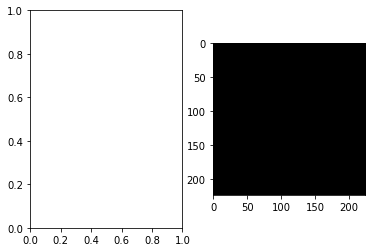

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

# ground1 = '/usr/xtmp/vs196/mammoproj/Data/final_dataset/train/'
ground2 = '/usr/xtmp/vs196/mammoproj/Data/final_dataset_corrected/train/'

pat_id = 'Irregular/DP_AIOQ_149979_1'

# mask1 = np.load(os.path.join(ground1, pat_id + '.npy'))[1,:,:]
mask2 = np.load(os.path.join(ground2, pat_id + '.npy'))[1,:,:]

# print(np.sum(mask1 != mask2))
print(np.count_nonzero(mask2))

fig, axes = plt.subplots(1, 2)
# axes[0].imshow(mask1, cmap='gray')
axes[1].imshow(mask2, cmap='gray')

### [Outdated] Create a graph averaging IOUs WITHOUT error bands

    iou_avg        10        20        30        40        50
0  0.327317  0.328328  0.327729  0.327149  0.326454  0.326926
1  0.344655  0.344635  0.346371  0.346053  0.343914  0.342301
2  0.366326  0.364745  0.367188  0.368795  0.363342  0.367563
3  0.413559  0.410532  0.413333  0.417389  0.404081  0.422457
4  0.478789  0.475476  0.479030  0.478926  0.465763  0.494750
    iou_avg        10        20        30        40        50
0  0.327270  0.328107  0.325479  0.326361  0.328308  0.328097
1  0.345226  0.347602  0.339311  0.341808  0.347754  0.349655
2  0.370676  0.371775  0.368479  0.371065  0.368628  0.373434
3  0.396291  0.395524  0.398746  0.400719  0.387662  0.398804
4  0.398363  0.401401  0.419546  0.418445  0.356112  0.396312
    iou_avg        10        20        30        40        50
0  0.331572  0.333736  0.331666  0.331474  0.331818  0.329165
1  0.366027  0.373361  0.358330  0.366628  0.372221  0.359594
2  0.413554  0.422436  0.401551  0.411725  0.433045  0.399011
3  0.463

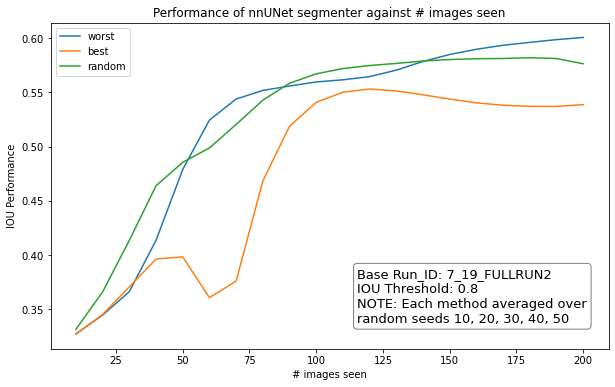

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


csv_base = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'

# csv output format:
'''
Index(['Unnamed: 0', 'random_seed', 'query_type', 'imgs_seen', 'IOU',
       'num_correctly_labeled', 'saved_model_location'],
      dtype='object')
'''

filename = os.path.join(csv_base, "Run_7_19_FULLRUN2_10_10", "experiment_output.csv")
data = pd.read_csv(filename)
# print(data['num_correctly_labeled'])

def calculate_mean_over_results_and_plot(csv_base):

      fig, ax = plt.subplots()
      fig.set_figwidth(10)
      fig.set_figheight(6)
    #   sns.set_theme(style="darkgrid")
      
      for method in ['worst', 'best', 'random']:
            dfs = pd.DataFrame(0, index=range(20), columns=['iou_avg'])
            for i in range(10, 60, 10):
                  cur = os.path.join(csv_base, f"Run_7_19_FULLRUN2_{i}_{i}", "experiment_output.csv")
                  df = pd.read_csv(cur)

                  values = df.loc[df['query_type'] == method, 'IOU'].reset_index(drop=True)
                  dfs['iou_avg'] += values
                  dfs[i] = values
            
            dfs['iou_avg'] /= 5
            # print(dfs.head())

            # df_avg = (pd.concat(dfs).replace(0, np.nan).reset_index().groupby("index").mean())
            # print(df_avg)

                  
            plt.plot(df.loc[df['query_type'] == method, 'imgs_seen'], dfs.iou_avg, label = method)
      
      plt.legend()
      props = dict(boxstyle='round', facecolor='white', alpha=0.5)
      plt.text(0.55, 0.25, 'Base Run_ID: 7_19_FULLRUN2\nIOU Threshold: 0.8\nNOTE: Each method averaged over\nrandom seeds 10, 20, 30, 40, 50', transform=ax.transAxes, fontsize=13,
            verticalalignment='top', bbox=props)
      plt.xlabel("# images seen")
      plt.ylabel('IOU Performance')
      plt.title('Performance of nnUNet segmenter against # images seen')


calculate_mean_over_results_and_plot(csv_base)

# ax.set_facecolor("black")


## Create error band graphs averaging either IOU or # Correctly Labeleled

   avg  10  20  30  40  50
0  0.0   0   0   0   0   0
1  0.0   0   0   0   0   0
2  0.0   0   0   0   0   0
3  0.0   0   0   0   0   0
4  0.0   0   0   0   0   0
    avg  10  20  30  40  50
0   4.8   4   6   7   5   2
1   7.2   7   8   9   7   5
2   9.6  10  10  11   9   8
3  12.0  12  12  13  12  11
4  14.4  14  15  16  15  12
   avg  10  20  30  40  50
0  0.6   1   0   1   0   1
1  0.6   1   0   1   0   1
2  2.0   2   0   2   4   2
3  3.8   3   2   4   5   5
4  4.8   6   3   5   5   5


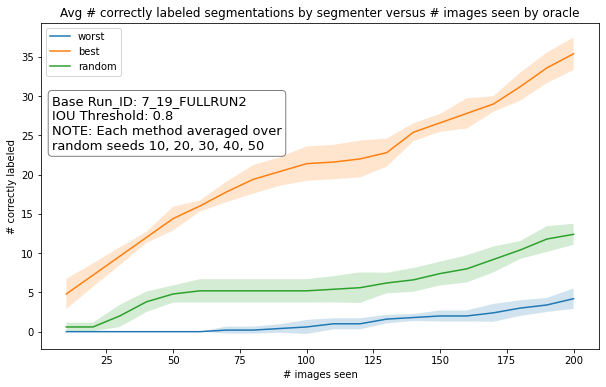

In [44]:
# Impementing error bands - create error bands graph for results on different random seeds
# TODO: This code is specific to 5 random seeds! Need to update so that it can average over any number of runs
# TODO: Vertical dotted lines to indicate where I update the segmenter and discriminator on the graph!

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


csv_base = '/usr/xtmp/sc834/mammoproj/nnunet_integration_tmp/AllOracleRuns/'

# csv output format:
'''
Index(['Unnamed: 0', 'random_seed', 'query_type', 'imgs_seen', 'IOU',
       'num_correctly_labeled', 'saved_model_location'],
      dtype='object')
'''

filename = os.path.join(csv_base, "Run_7_19_FULLRUN2_10_10", "experiment_output.csv")
data = pd.read_csv(filename)
# graph_target = 'IOU'
graph_target = 'num_correctly_labeled'
# print(data['num_correctly_labeled'])

def calculate_mean_over_results_and_plot(csv_base, graph_target):

      fig, ax = plt.subplots()
      fig.set_figwidth(10)
      fig.set_figheight(6)
    #   sns.set_theme(style="darkgrid")
      
      for method in ['worst', 'best', 'random']:
            dfs = pd.DataFrame(0, index=range(20), columns=['avg'])
            for i in range(10, 60, 10):
                  cur = os.path.join(csv_base, f"Run_7_19_FULLRUN2_{i}_{i}", "experiment_output.csv")
                  df = pd.read_csv(cur)

                  values = df.loc[df['query_type'] == method, graph_target].reset_index(drop=True)
                  dfs['avg'] += values
                  dfs[i] = values
            
            dfs['avg'] /= 5
            print(dfs.head())

            # Calculate std
            std = dfs.iloc[:,[1,2,3,4,5]].std(axis=1)
            # print(dfs.iloc[:,[1,2,3,4,5]].head())

            # df_avg = (pd.concat(dfs).replace(0, np.nan).reset_index().groupby("index").mean())
            # print(df_avg)
            
            x =  df.loc[df['query_type'] == method, 'imgs_seen']
            y = dfs.avg 
            plt.plot(x, y, label = method)
            plt.fill_between(x, y - std, y + std, alpha=0.2)

            # plt.plot(x, mean_1, 'b-', label='mean_1')
            # plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='b', alpha=0.2)
            # plt.plot(x, mean_2, 'r--', label='mean_2')
            # plt.fill_between(x, mean_2 - std_2, mean_2 + std_2, color='r', alpha=0.2)
      
      if graph_target == 'IOU':
            plt.legend()
            props = dict(boxstyle='round', facecolor='white', alpha=0.5)
            plt.text(0.55, 0.25, 'Base Run_ID: 7_19_FULLRUN2\nIOU Threshold: 0.8\nNOTE: Each method averaged over\nrandom seeds 10, 20, 30, 40, 50', transform=ax.transAxes, fontsize=13,
                  verticalalignment='top', bbox=props)
            plt.xlabel("# images seen")
            plt.ylabel('IOU Performance')
            plt.title('Performance of nnUNet segmenter against # images seen')
      else:
            plt.legend()
            props = dict(boxstyle='round', facecolor='white', alpha=0.5)
            plt.text(0.02, 0.78, 'Base Run_ID: 7_19_FULLRUN2\nIOU Threshold: 0.8\nNOTE: Each method averaged over\nrandom seeds 10, 20, 30, 40, 50', transform=ax.transAxes, fontsize=13,
                  verticalalignment='top', bbox=props)
            plt.xlabel("# images seen")
            plt.ylabel('# correctly labeled')
            plt.title('Avg # correctly labeled segmentations by segmenter versus # images seen by oracle')


calculate_mean_over_results_and_plot(csv_base, graph_target)

# ax.set_facecolor("black")
